<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

**Описание данных** 

Датафрейм содержит исторические данные о поведении клиентов и расторжении договоров с банком:

- RowNumber — индекс строки в данных,

- CustomerId — уникальный идентификатор клиента,

- Surname — фамилия,

- CreditScore — кредитный рейтинг,

- Geography — страна проживания,

- Gender — пол,

- Age — возраст,

- Tenure — сколько лет человек является клиентом банка,

- Balance — баланс на счёте,

- NumOfProducts — количество продуктов банка, используемых клиентом,

- HasCrCard — наличие кредитной карты,

- IsActiveMember — активность клиента,

- EstimatedSalary — предполагаемая зарплата.


Целевой признак

- Exited — факт ухода клиента.


## Подготовка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from tqdm import tqdm

In [2]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/Churn.csv')

In [3]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


In [6]:
data.columns = map(str.lower, data.columns)

In [7]:
data

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


In [8]:
data.rename(columns = {'customerid': 'customer_id', 'creditscore': 'credit_score', 'numofproducts': 'num_of_products', 'hascrcard': 'cr_card', 'isactivemember': 'is_active_member', 'estimatedsalary': 'estimated_salary'}, inplace = True)

In [9]:
data.columns

Index(['rownumber', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'cr_card',
       'is_active_member', 'estimated_salary', 'exited'],
      dtype='object')

In [10]:
data = data.sample(frac=1, random_state=12345).drop(['surname', 'rownumber', 'customer_id'], axis=1)

In [11]:
data = pd.get_dummies(data, drop_first=True)

In [12]:
data

,credit_score,age,tenure,balance,num_of_products,cr_card,is_active_member,estimated_salary,exited,geography_Germany,geography_Spain,gender_Male
7867,640,46,3.0,0.00,1,1,1,156260.08,0,0,1,0
1402,757,29,8.0,130306.49,1,1,0,77469.38,0,0,0,1
8606,807,42,5.0,0.00,2,1,1,74900.90,0,0,1,1
8885,668,45,4.0,102486.21,2,1,1,158379.25,0,0,1,1
6494,699,28,7.0,0.00,2,1,1,22684.78,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4478,549,31,4.0,0.00,2,0,1,25684.85,0,0,0,1
4094,513,29,10.0,0.00,2,0,1,25514.77,0,0,0,1
3492,655,45,NaN,57327.04,1,0,1,47349.00,0,0,0,0
2177,667,24,4.0,0.00,2,0,1,34335.55,0,0,0,0


In [13]:
data.duplicated().sum()

0

In [14]:
data.isna().sum()

credit_score           0
age                    0
tenure               909
balance                0
num_of_products        0
cr_card                0
is_active_member       0
estimated_salary       0
exited                 0
geography_Germany      0
geography_Spain        0
gender_Male            0
dtype: int64

In [15]:
data['tenure'].value_counts()

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: tenure, dtype: int64

In [16]:
from random import randint
import math
def nan_random(v):
    if math.isnan(v):
        return randint(0, 10)
    else:
        return v

In [17]:
data['tenure'] = data['tenure'].apply(nan_random)

In [18]:
data['tenure'].isna().sum()

0

In [19]:
data['tenure'].value_counts()

1.0     1040
2.0     1030
3.0     1018
8.0     1015
5.0     1011
7.0      989
4.0      972
6.0      967
9.0      948
10.0     531
0.0      479
Name: tenure, dtype: int64

In [20]:
features = data.drop(['exited'], axis=1)
target = data['exited']

In [21]:
features

,credit_score,age,tenure,balance,num_of_products,cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
7867,640,46,3.0,0.00,1,1,1,156260.08,0,1,0
1402,757,29,8.0,130306.49,1,1,0,77469.38,0,0,1
8606,807,42,5.0,0.00,2,1,1,74900.90,0,1,1
8885,668,45,4.0,102486.21,2,1,1,158379.25,0,1,1
6494,699,28,7.0,0.00,2,1,1,22684.78,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4478,549,31,4.0,0.00,2,0,1,25684.85,0,0,1
4094,513,29,10.0,0.00,2,0,1,25514.77,0,0,1
3492,655,45,0.0,57327.04,1,0,1,47349.00,0,0,0
2177,667,24,4.0,0.00,2,0,1,34335.55,0,0,0


In [22]:
features_train, features_df, target_train, target_df = train_test_split(
    features, target, test_size=0.4, random_state=12345, stratify=target)

In [23]:
print(features_train.shape)

(6000, 11)


In [24]:
features_test, features_valid, target_test, target_valid = train_test_split(
    features_df, target_df, test_size=0.5, random_state=12345, stratify=target_df)

In [25]:
numeric = ['credit_score', 'age', 'balance', 'estimated_salary', 'num_of_products']

In [26]:
scaler = StandardScaler()

In [27]:
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])
features_train.head()

,credit_score,age,tenure,balance,num_of_products,cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
5753,1.139597,0.194974,6.0,-1.215720,0.799463,0,0,0.030581,0,1,0
1682,-0.314845,0.194974,3.0,0.358834,-0.926617,1,0,-0.256477,0,0,1
358,0.900653,0.194974,1.0,0.423724,-0.926617,1,1,0.414512,0,0,1
1493,0.308487,-0.857302,3.0,-1.215720,-0.926617,1,0,1.051336,0,1,0
8170,-0.533011,2.108202,1.0,0.789963,-0.926617,0,1,-0.162666,1,0,1


**Вывод:** 

данные содержат 10 тысяч строк в 14 столбцах. В ходе предобработки я удалила 2 столбца: 'Surname' содержащий фамилии и 'RowNumber' задвоивший порядковый номер строк. Пропуски обнаружены в столбце 'tenure' в количестве почти 10% от отщего числа строк. Я сначала попыталась восстановить их с помощью импутера, но отследила через value_counts, что импутер добавил среднее значение и "5" стало на 909 больше, за счет чего сильно изменился баланс. Поэтому я решила просто не учитывать этот столбец в фичах. Если удалить эти строки, то почти 10% данных полеряются и в других столбцах. 

Применила стандартизацию для уравнения значимости всех признаков.

## Исследование задачи

0    0.7963
1    0.2037
Name: exited, dtype: float64


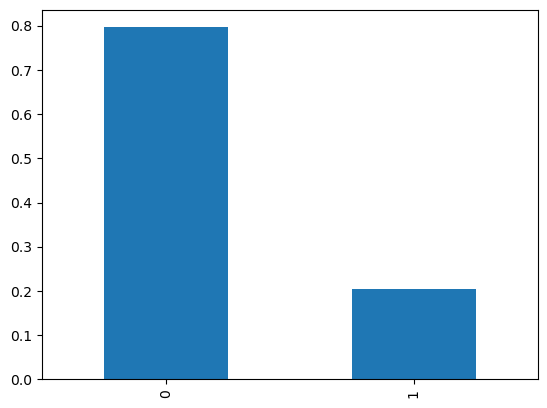

In [28]:
class_frequency = target.value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar');

***Комментарий:*** 
соотношение классов 80:20: данные содержат 80% информации о действующих клиентах банка и 20% об ушедших.

***LogisticRegression***

In [29]:
model_lr = (LogisticRegression(random_state=12345, solver='liblinear')).fit(features_train, target_train)

In [30]:
print(confusion_matrix(target_valid, model_lr.predict(features_valid)))

[[1536   57]
 [ 328   79]]


***Комментарий*** 
без баланса классов модель LogisticRegression находит лучше всего TN и FN. Почти все положительные ответы попадают в FN

(0.0, 1.0)

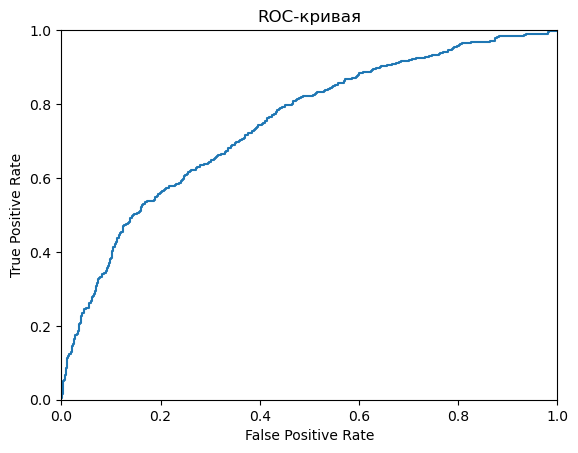

In [31]:
fpr, tpr, thresholds = roc_curve(target_valid, model_lr.predict_proba(features_valid)[:,1]) 

plt.figure()
plt.title('ROC-кривая')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])

***Комментарий***

ROC-кривая LogisticRegression выглядит немногим лучше кривой случайной модели


In [32]:
auc_roc = roc_auc_score(target_valid, model_lr.predict_proba(features_valid)[:, 1])
print(auc_roc)

0.745452694605237


In [33]:
predicted_valid = model_lr.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.29097605893186


***RandomForest***

In [34]:
best_model_rfc = None
best_result_rfc = 0

for depth in tqdm(range(3, 50, 1)):
    
    for est in range(50, 250, 50):
        model = RandomForestClassifier(random_state=12345, max_depth=depth, n_estimators=est, criterion='gini') 
        model.fit(features_train, target_train) 
        predictions = model.predict(features_valid) 
        result = f1_score(target_valid, predictions) 
        if result > best_result_rfc:
            best_model_rfc = model
            best_result_rfc = result
print("f1 лучшей модели:", best_result_rfc)
print("Наилучшая модель:", best_model_rfc)

100%|██████████████████████████████████████████████████████████████████████████████████| 47/47 [02:08<00:00,  2.73s/it]

f1 лучшей модели: 0.5894736842105263
Наилучшая модель: RandomForestClassifier(max_depth=26, n_estimators=50, random_state=12345)


(0.0, 1.0)

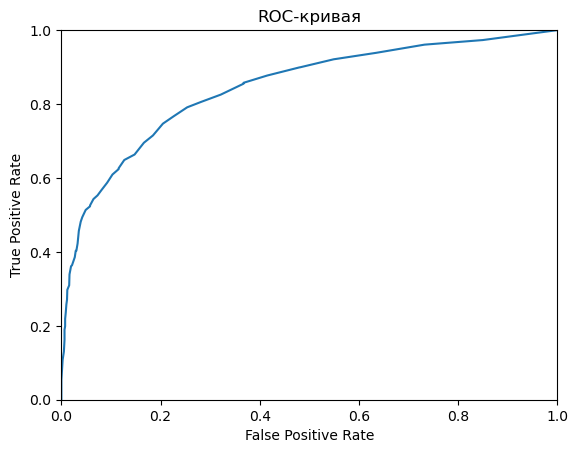

In [35]:
fpr, tpr, thresholds = roc_curve(target_valid, best_model_rfc.predict_proba(features_valid)[:,1]) 

plt.figure()
plt.title('ROC-кривая')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])

In [36]:
predicted = best_model_rfc.predict(features_valid)

In [37]:
print(confusion_matrix(target_valid, predicted))

[[1531   62]
 [ 211  196]]


***Комментарий***
модель часто ошибается на FN, больше половины положительных ответов попадает туда. Нули модель распознает довольно хорошо

In [38]:
print(recall_score(target_valid, predicted))

0.48157248157248156


***Комментарий*** 
не очень высокий показатель полноты - модель неважно ищет положительные ответы, что заметно по матрице ошибок

In [39]:
print(precision_score(target_valid, predicted))

0.7596899224806202


***Комментарий***
хороший показатель точности - модель хорошо находит отрицательные ответы

In [40]:
print("Среднегармоническое полноты и точности:", f1_score(target_valid, predicted))

Среднегармоническое полноты и точности: 0.5894736842105263


**Вывод:** из двух обученных моделей без учета баланса классов, модель RF показала результат f1 выше. У второй модели проблемы с предсказанием 1, она неплохо видит 0, даже там где их нет.

## Борьба с дисбалансом

***Взвешивание классов***

In [41]:
model_balanced_lr = LogisticRegression(class_weight='balanced', random_state=12345, solver='liblinear')
model_balanced_lr.fit(features_train, target_train)
predicted_valid = model_balanced_lr.predict(features_valid)
print("F1 после баланса:", f1_score(target_valid, predicted_valid))

F1 после баланса: 0.4690496948561465


***Комментарий*** 

f1 за счет баланса повысилась с 0.3 до 0.47 - прогресс есть

(0.0, 1.0)

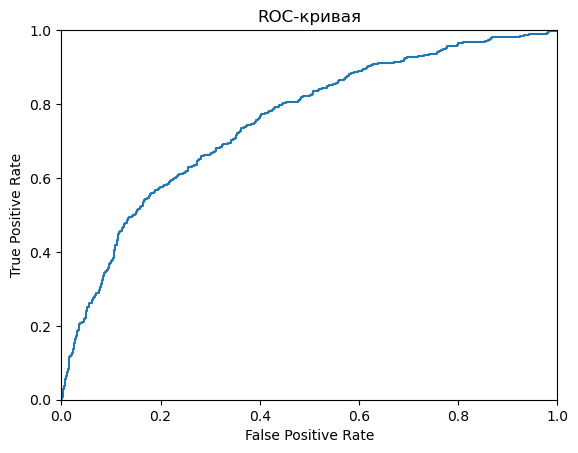

In [42]:
fpr, tpr, thresholds = roc_curve(target_valid, model_balanced_lr.predict_proba(features_valid)[:,1]) 

plt.figure()
plt.title('ROC-кривая')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])

In [43]:
auc_roc = roc_auc_score(target_valid,  model_balanced_lr.predict_proba(features_valid)[:, 1])
print(auc_roc)

0.7518874807010401


***Комментарий***

значение метрики auc_roc повысилось на 0.01

In [44]:
print(confusion_matrix(target_valid, (model_balanced_lr.predict(features_valid))))

[[1122  471]
 [ 138  269]]


***Комментарий***
после баланса модель стала стала лучше находить единицы, но начала путать нули: появилось очень много FP ответов.

In [45]:
probabilities_valid = model_balanced_lr.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0, 0.8, 0.05):
    predicted_valid = probabilities_one_valid > threshold 
    precision = precision_score(target_valid, predicted_valid) 
    recall = recall_score(target_valid, predicted_valid) 

    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}".format(
        threshold, precision, recall))

Порог = 0.00 | Точность = 0.203, Полнота = 1.000
Порог = 0.05 | Точность = 0.203, Полнота = 0.998
Порог = 0.10 | Точность = 0.207, Полнота = 0.990
Порог = 0.15 | Точность = 0.218, Полнота = 0.980
Порог = 0.20 | Точность = 0.234, Полнота = 0.966
Порог = 0.25 | Точность = 0.252, Полнота = 0.926
Порог = 0.30 | Точность = 0.271, Полнота = 0.897
Порог = 0.35 | Точность = 0.290, Полнота = 0.843
Порог = 0.40 | Точность = 0.312, Полнота = 0.803
Порог = 0.45 | Точность = 0.339, Полнота = 0.735
Порог = 0.50 | Точность = 0.364, Полнота = 0.661
Порог = 0.55 | Точность = 0.402, Полнота = 0.597
Порог = 0.60 | Точность = 0.452, Полнота = 0.541
Порог = 0.65 | Точность = 0.491, Полнота = 0.464
Порог = 0.70 | Точность = 0.490, Полнота = 0.371
Порог = 0.75 | Точность = 0.516, Полнота = 0.280


***Комментарий*** 

вот я посмотрела пороги и значения, а как мне изменить порог с дефолтного 0.5 я не понимаю, в обучении вроде нет этой информации. Я бы хотела снизить порог и посмотреть как изменится f1.


In [46]:
best_model_rfc_balance = None
best_result_rfc_balance = 0

for depth in tqdm(range(3, 50, 1)):
    
    for est in range(50, 250, 50):
        model = RandomForestClassifier(class_weight='balanced', random_state=12345, max_depth=depth, n_estimators=est, criterion='gini') 
        model.fit(features_train, target_train) 
        predictions = model.predict(features_valid) 
        result = f1_score(target_valid, predictions) 
        if result > best_result_rfc_balance:
            best_model_rfc_balance = model
            best_result_rfc_balance = result
print("f1 лучшей модели:", best_result_rfc_balance)
print("Наилучшая модель:", best_model_rfc_balance)

100%|██████████████████████████████████████████████████████████████████████████████████| 47/47 [02:06<00:00,  2.68s/it]

f1 лучшей модели: 0.608
Наилучшая модель: RandomForestClassifier(class_weight='balanced', max_depth=8, n_estimators=200,
                       random_state=12345)


***Oversample***

In [47]:
num = 3
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, num)

0    0.565846
1    0.434154
Name: exited, dtype: float64


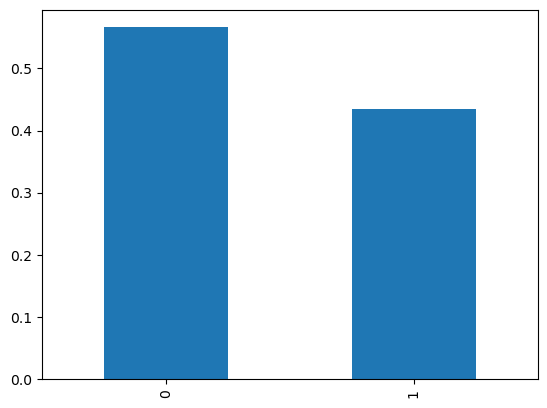

In [48]:
class_frequency = target_upsampled.value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar');

In [49]:
best_upsample_model = None
best_upsample_result = 0

for depth in tqdm(range(3, 50, 1)):
    
    for est in range(50, 250, 50):
        model = RandomForestClassifier(random_state=12345, max_depth=depth, n_estimators=est, criterion='gini') 
        model.fit(features_upsampled, target_upsampled) 
        predictions = model.predict(features_valid) 
        result = f1_score(target_valid, predictions) 
        if result > best_upsample_result:
            best_upsample_model = model
            best_upsample_result = result
print("f1 лучшей модели:", best_upsample_result)
print("Наилучшая модель:", best_upsample_model)

100%|██████████████████████████████████████████████████████████████████████████████████| 47/47 [02:45<00:00,  3.52s/it]

f1 лучшей модели: 0.6126126126126126
Наилучшая модель: RandomForestClassifier(max_depth=13, n_estimators=200, random_state=12345)


In [50]:
print(confusion_matrix(target_valid, (best_upsample_model.predict(features_valid))))

[[1461  132]
 [ 169  238]]


In [51]:
model_upsample_lr = LogisticRegression(random_state=12345, solver='liblinear')
model_upsample_lr.fit(features_upsampled, target_upsampled)
predicted_valid = model_upsample_lr.predict(features_valid)
print("F1 после баланса:", f1_score(target_valid, predicted_valid))

F1 после баланса: 0.4836734693877551


**Вывод:** 
после работы над дисбалансом классов метрика f1 моделей возрасла. Я применила взвешивание классов и upsampling для модели логистической регресии и случайного леса. Лучший результат показала модель RandomForest upsampling, ее и оставим для тестирования.

## Тестирование модели

In [52]:
test_predictions = best_upsample_model.predict(features_test)

In [53]:
print("F1:", f1_score(target_test, test_predictions))

F1: 0.6022871664548921


In [54]:
print(confusion_matrix(target_test, (best_upsample_model.predict(features_test))))

[[1450  142]
 [ 171  237]]


***Комментарий***
модель справляется с положительными и отрицательными ответами, но в FN и FP все еще попадает много.

(0.0, 1.0)

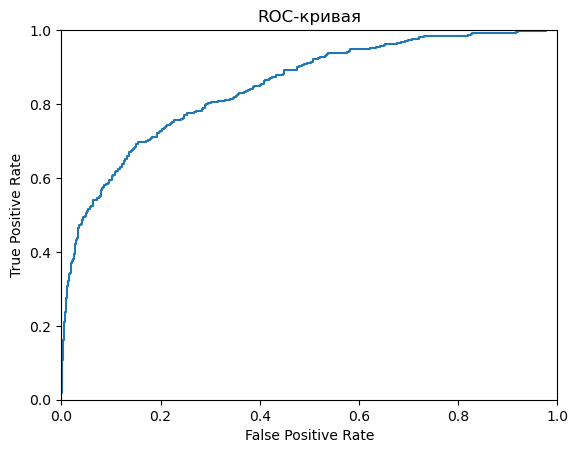

In [55]:
fpr, tpr, thresholds = roc_curve(target_test, best_upsample_model.predict_proba(features_test)[:,1]) 

plt.figure()
plt.title('ROC-кривая')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])

In [56]:
auc_roc = roc_auc_score(target_test, best_upsample_model.predict_proba(features_test)[:, 1])
print(auc_roc)

0.8469692211055276


**Вывод:**  

у модели достаточно высокий roc_auc: 0.85, она неплохо справляется с класификацией положительных и отрицательных ответов, f1 достигает 0.61.

In [57]:
test_predictions_balance = best_model_rfc_balance.predict(features_test)
print("F1:", f1_score(target_test, test_predictions_balance))

F1: 0.5958904109589042


In [58]:
print(confusion_matrix(target_test, (best_model_rfc_balance.predict(features_test))))

[[1385  207]
 [ 147  261]]


(0.0, 1.0)

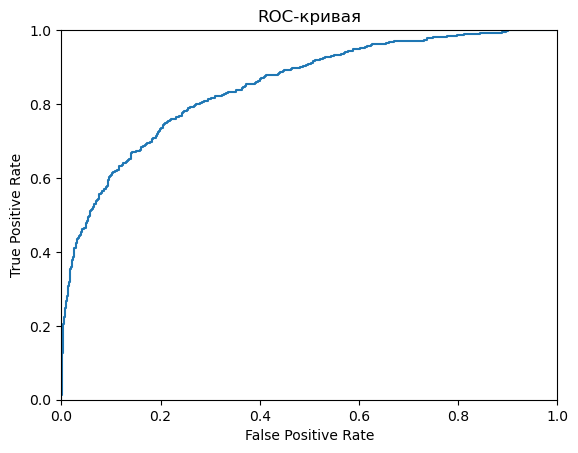

In [59]:
fpr, tpr, thresholds = roc_curve(target_test, best_model_rfc_balance.predict_proba(features_test)[:,1]) 

plt.figure()
plt.title('ROC-кривая')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])

In [60]:
auc_roc = roc_auc_score(target_test, best_model_rfc_balance.predict_proba(features_test)[:, 1])
print(auc_roc)

0.8486257882550005


### Вывод:

Датафрейм содержит исторические данные - каждый объект в наборе данных это информация о поведении одного клиента. Целевой признак - факт ухода клиента, данные содержат признаки, основываясь на которых модель должна предположить расторгнет ли пользователь договор с банком. Среди признаков: кредитный рейтинг, страна проживания, пол и возраст, баланс на счёте, количество продуктов банка, используемых клиентом, наличие кредитной карты, активность клиента и предполагаемая зарплата. 


В датафрейме хранятся 10 тысяч строк в 14 столбцах, данные были разбиты на 3 выборки в соотношении 60:20:20 - обучающая, валидационная и тестовая.
 

- соотношение классов 80:20: 80% информации о действующих клиентах банка и 20% об ушедших. 


Без баланса классов модель LogisticRegression находит лучше всего TN и FN. Почти все положительные ответы попадают в FN. 

- модель LogisticRegression f1 за счет баланса повысилась с 0.3 до 0.48;
- после баланса модель стала стала лучше находить единицы, но начала путать нули: появилось очень много FP ответов, до баланса их было всего 55, а теперь 470. FN до баланса было 323, а после стало 137. TP до баланса было 88, а после 270;
- среднегармоническое полноты и точности модели RF после баланса возросло с 0.56 до 0.61.

После работы над дисбалансом классов метрика f1 моделей возрасла. Я применила взвешивание классов для модели логистической регресии, для модели случайного леса лучший результат показала техника upsampling. 

 
Для работы с тестовой выборкой были взяты модели с наилушим показателем f1 - RF после баланса. На тестовой выборке roc_auc: 0.85, f1 достигает 0.61


## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*